In [7]:
!pip install nltk

In [8]:
!pip install matplotlib seaborn

In [9]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=61d3d04698231aa658d2a5ebc99a37fd7d96abc6330084cefaad028b36a65810
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [10]:
!pip install imbalanced-learn

In [11]:
# Load dataset
import pandas as pd

df = pd.read_csv('/content/chatgpt_review_dataset.csv')
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [12]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [ ]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [14]:
import nltk
nltk.download('punkt')        # for word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')   # for stopwords
nltk.download('wordnet')     # for lemmatizer
nltk.download('omw-1.4')
from langdetect import detect, DetectorFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0


# Test everything
print("Stopwords example:", stopwords.words('english')[:5])
print("Tokenize test:", word_tokenize("ChatGPT is amazing!"))
print("Lemmatizer test:", WordNetLemmatizer().lemmatize("running"))
print("Language detect:", detect("This is an English sentence."))

Stopwords example: ['a', 'about', 'above', 'after', 'again']
Tokenize test: ['ChatGPT', 'is', 'amazing', '!']
Lemmatizer test: running
Language detect: en


In [16]:
# ==============================================
#  TEXT PREPROCESSING
# ==============================================

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory

# Fix seed for language detection consistency
DetectorFactory.seed = 0

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# ------------------------------------------------
# ✅ Clean text function
# ------------------------------------------------
def clean_text(text):
    if pd.isnull(text):
        return ""

    # 1️⃣ Convert to lowercase
    text = text.lower()

    # 2️⃣ Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 3️⃣ Remove special characters, punctuation, numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 4️⃣ Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 5️⃣ Tokenization
    tokens = word_tokenize(text)

    # 6️⃣ Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 7️⃣ Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 8️⃣ Join back to a single string
    return ' '.join(tokens)


# ------------------------------------------------
# Language detection (keep English only)
# ------------------------------------------------
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False


# ==============================================
# 🧾 APPLY PREPROCESSING TO DATAFRAME
# ==============================================

# Example: read your dataset
df = pd.read_csv('/content/chatgpt_review_dataset.csv')

# Handle missing values
df.dropna(subset=['review'], inplace=True)

#  Keep only English reviews
df = df[df['review'].apply(is_english)]

# Apply text cleaning
df['cleaned_text'] = df['review'].apply(clean_text)

# Show results
print(df[['review', 'cleaned_text']].head())

# Save preprocessed data if needed
df.to_csv('cleaned_chatgpt_reviews.csv', index=False)
print("✅ Preprocessing completed and saved as 'cleaned_chatgpt_reviews.csv'")


                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                        cleaned_text  
0  impressive natural language understanding almo...  
1  sometimes give wrong answer outdated info stud...  
2  great tool generating content quickly interest...  
3  great tool generating content quickly start me...  
4  excellent language translation grammar fix pri...  
✅ Preprocessing completed and saved as 'cleaned_chatgpt_reviews.csv'


In [17]:
# Convert rating to sentiment
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


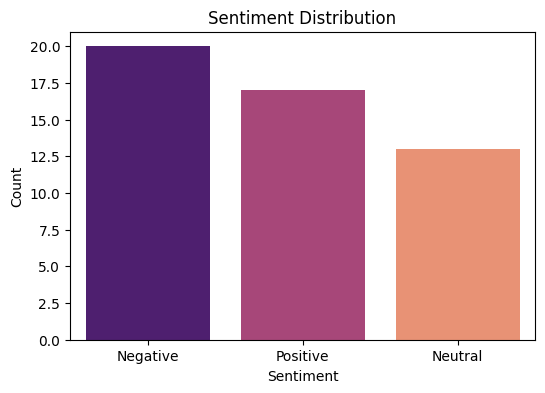

In [ ]:
# Plotting Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', hue='sentiment',data=df, palette='magma')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Percentage distribution
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

sentiment
Negative    40.0
Positive    34.0
Neutral     26.0
Name: proportion, dtype: float64


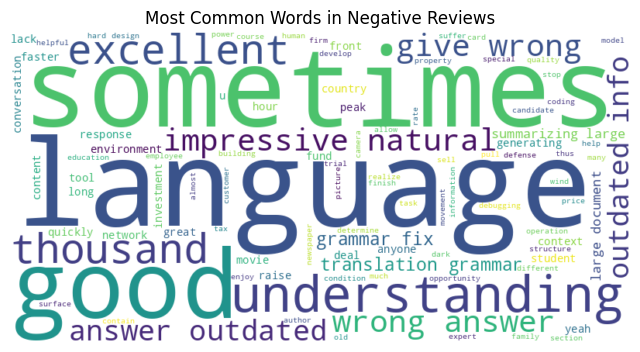

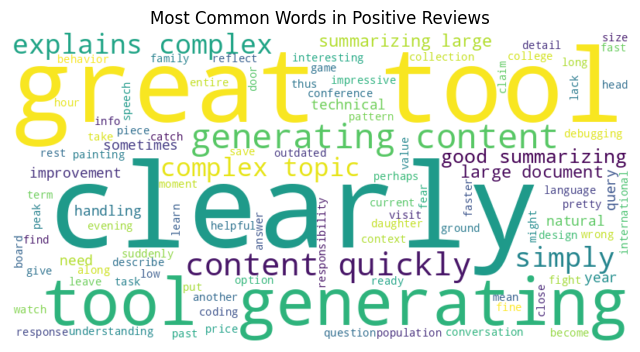

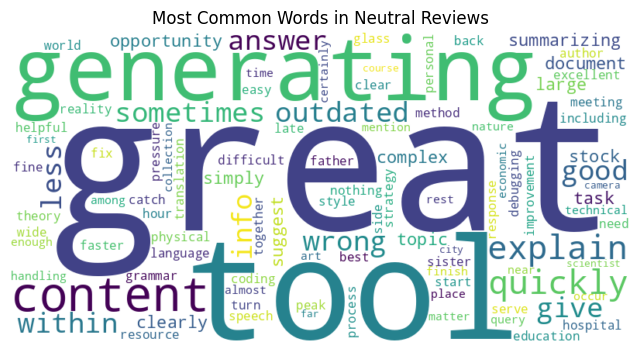

In [ ]:
# Word cloud for each sentiment

from wordcloud import WordCloud

for label in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == label]['cleaned_text'])
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap='viridis', max_words=100).generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {label} Reviews')
    plt.show()

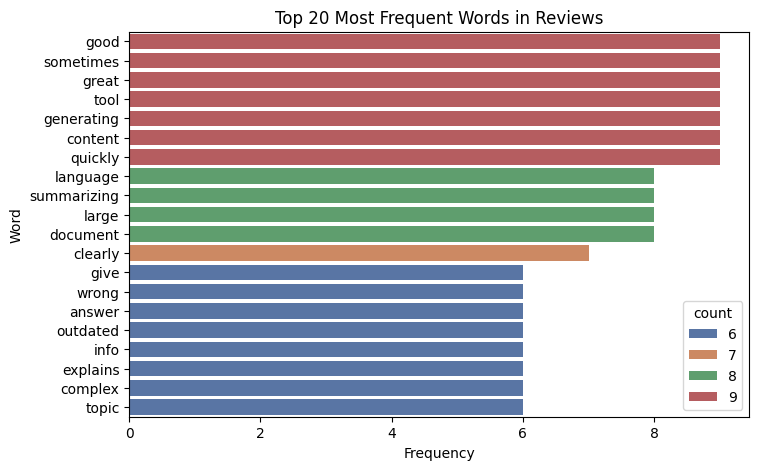

In [ ]:
# Histogram for most frequent word

from collections import Counter
import pandas as pd

# Combine all cleaned text
all_words = ' '.join(df['cleaned_text']).split()

# Count most common 20 words
common_words = Counter(all_words).most_common(20)
words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot histogram
plt.figure(figsize=(8,5))
sns.barplot(x='count',hue='count', y='word', data=words_df, palette='deep')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


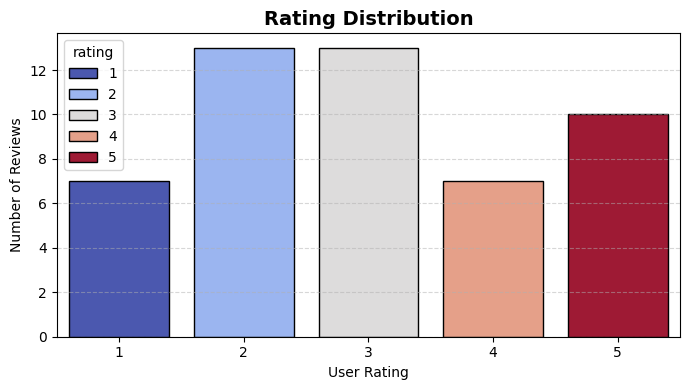

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x='rating', hue='rating', data=df, palette='coolwarm', edgecolor='black')

plt.title("Rating Distribution", fontsize=14, weight='bold')
plt.xlabel("User Rating")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

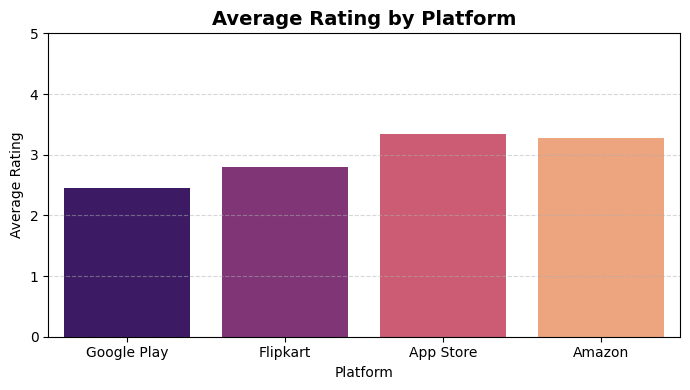

In [ ]:
# Average Rating by platform
plt.figure(figsize=(7,4))
sns.barplot(x='platform',hue='platform', y='rating', data=df, palette='magma', estimator='mean', errorbar=None)

plt.title("Average Rating by Platform", fontsize=14, weight='bold')
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # since ratings are usually 1–5
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

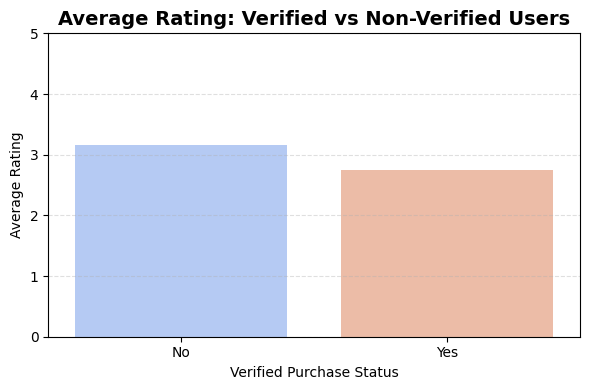

In [ ]:
#Average Rating by Verified Status

plt.figure(figsize=(6,4))
sns.barplot(x='verified_purchase',hue='verified_purchase', y='rating', data=df,
            palette='coolwarm', estimator='mean', errorbar=None)

plt.title("Average Rating: Verified vs Non-Verified Users", fontsize=14, weight='bold')
plt.xlabel("Verified Purchase Status")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

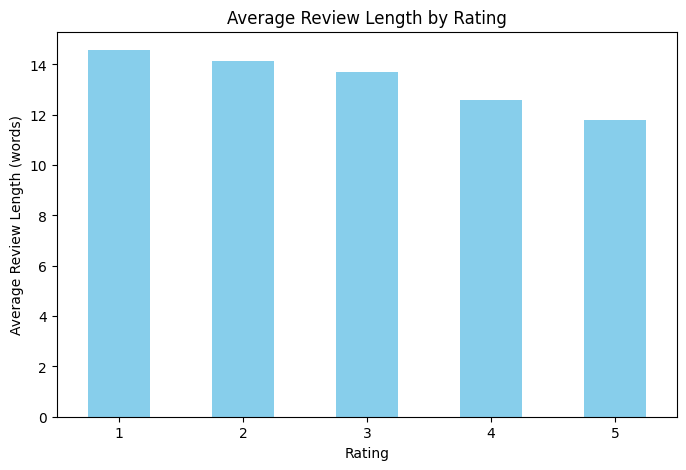

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by rating and calculate average review length
avg_length_by_rating = df.groupby('rating')['review_length'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_length_by_rating.plot(kind='bar', color='skyblue')
plt.title("Average Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Review Length (words)")
plt.xticks(rotation=0)
plt.show()

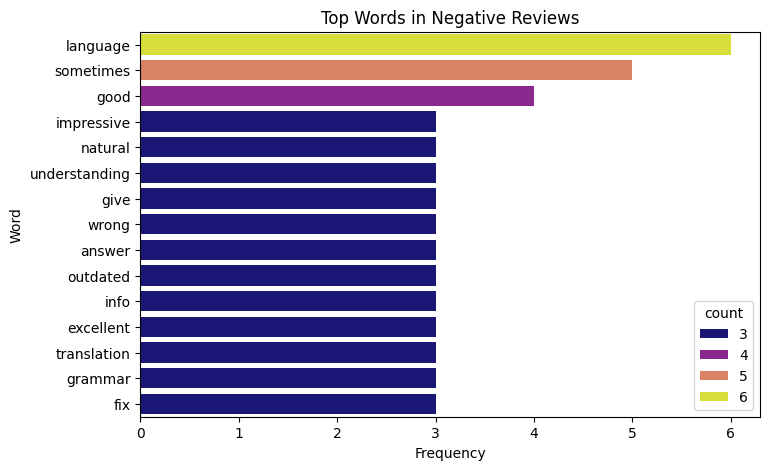

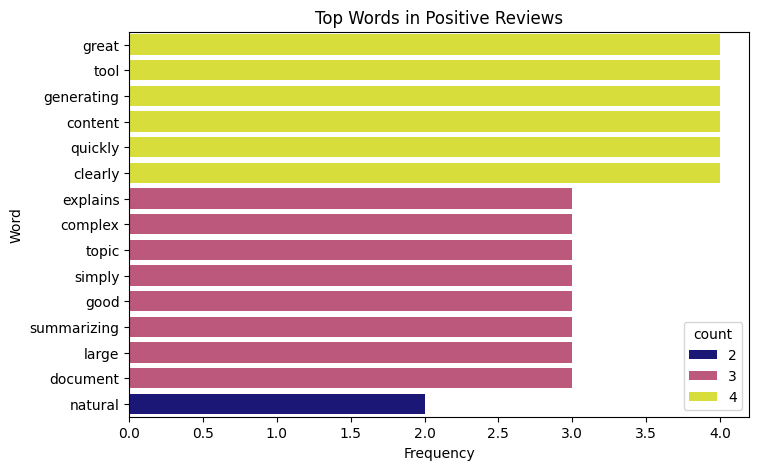

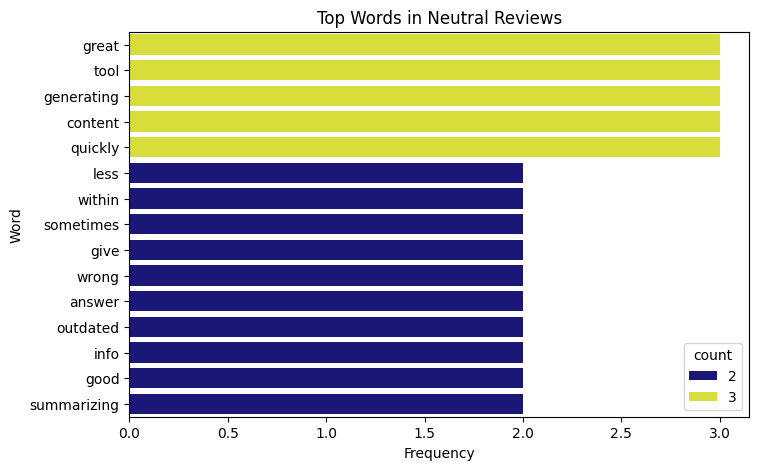

In [ ]:
# Sentiment-wise Word Frequency Visualization

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each sentiment category
for label in df['sentiment'].unique():
    # Combine all words for this sentiment
    text = ' '.join(df[df['sentiment'] == label]['cleaned_text']).split()

    # Get top 15 most frequent words
    common_words = Counter(text).most_common(15)
    words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    # Plot histogram
    plt.figure(figsize=(8,5))
    sns.barplot(x='count',hue='count', y='word', data=words_df, palette='plasma')
    plt.title(f'Top Words in {label} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()


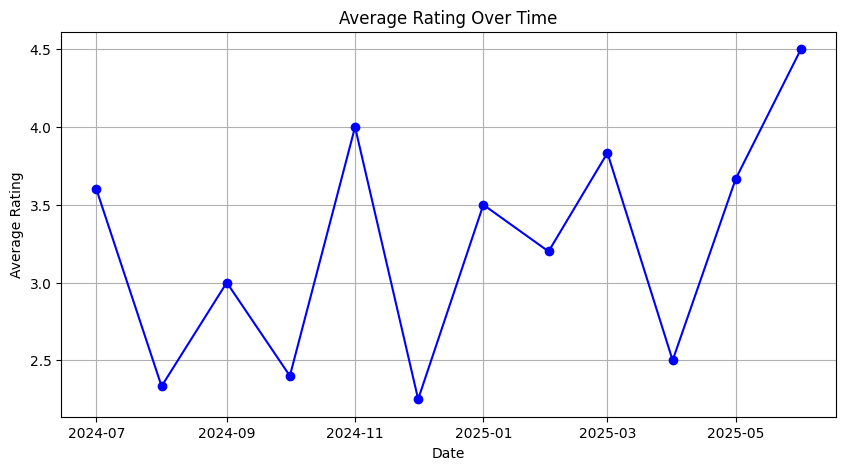

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate average rating
avg_rating = df.groupby(df['date'].dt.to_period('M'))['rating'].mean()

# Convert PeriodIndex to datetime for plotting
avg_rating.index = avg_rating.index.to_timestamp()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_rating.index, avg_rating.values, marker='o', color='blue')
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

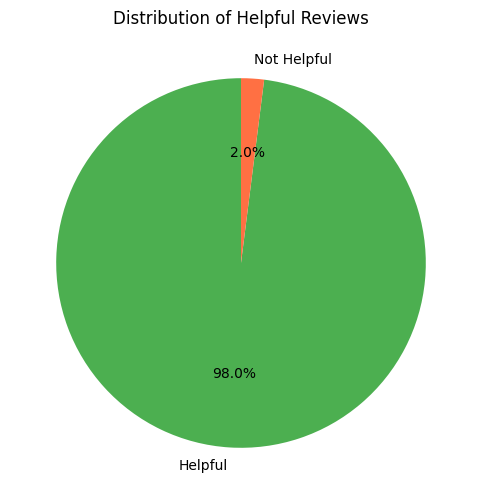

In [ ]:
#helpful votes---pie chart
import matplotlib.pyplot as plt

# Helpful flag: 1 = Helpful (votes > 10), 0 = Not Helpful
df['helpful_flag'] = df['helpful_votes'].apply(lambda x: 1 if x > 10 else 0)

# Count helpful vs not helpful
helpful_counts = df['helpful_flag'].value_counts()

# Map numeric flag to text labels
label_map = {1: 'Helpful', 0: 'Not Helpful'}
labels = [label_map[i] for i in helpful_counts.index]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(helpful_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50','#FF7043'])
plt.title('Distribution of Helpful Reviews')
plt.show()

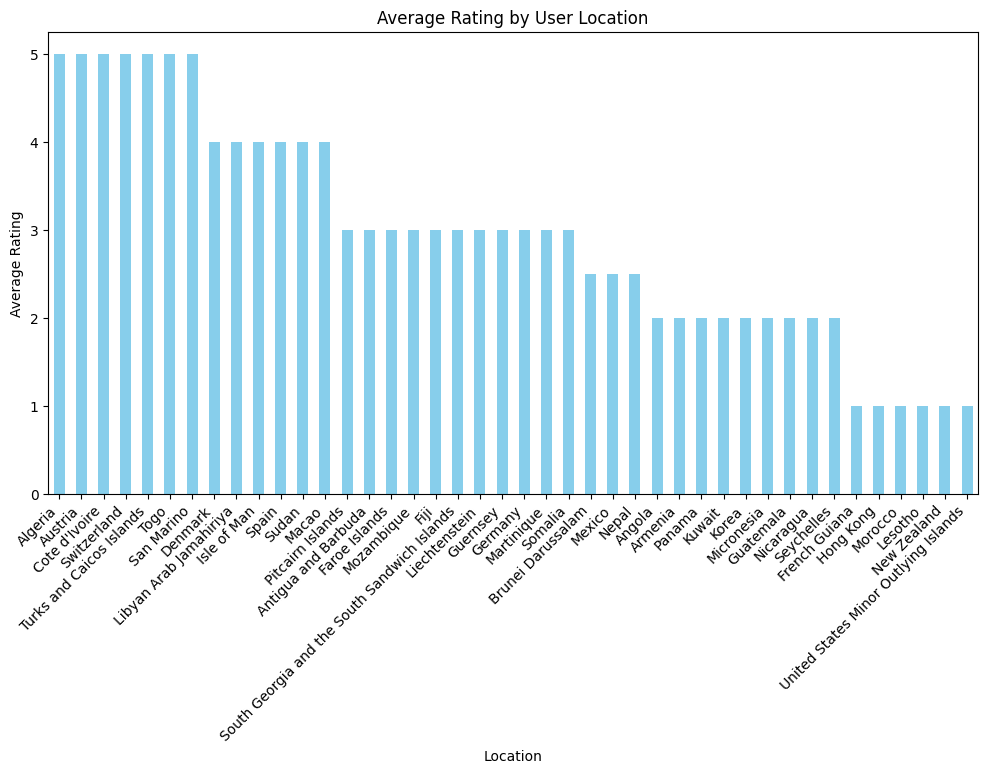

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by location and calculate average rating
avg_rating_by_location = df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
avg_rating_by_location.plot(kind='bar', color='skyblue')
plt.title("Average Rating by User Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipython-input-4263438906.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


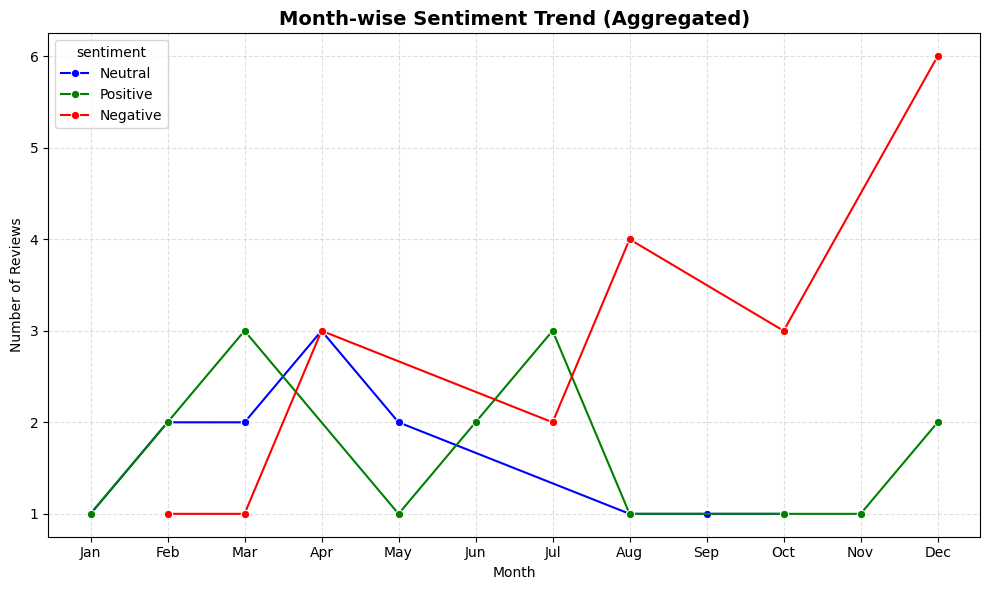

In [ ]:
# sentiment distribution trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop missing dates
df = df.dropna(subset=['date'])

# Extract only month names (Jan, Feb, Mar, ...)
df['month'] = df['date'].dt.strftime('%b')

# Order months correctly (not alphabetically)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Group by month and sentiment
month_trend = df.groupby(['month', 'sentiment']).size().reset_index(name='count')

# Ensure correct month order
month_trend['month'] = pd.Categorical(month_trend['month'], categories=month_order, ordered=True)
month_trend = month_trend.sort_values('month')

# Plot month-wise sentiment trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=month_trend,
    x='month',
    y='count',
    hue='sentiment',
    marker='o',
    palette={'Positive':'green', 'Negative':'red', 'Neutral':'blue'},
    estimator='mean',
    ci=None
)

plt.title('Month-wise Sentiment Trend (Aggregated)', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


In [19]:
# Convert text into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['cleaned_text'])
y = df['sentiment']


In [20]:
# Model trained using LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3

Confusion Matrix:
 [[2 0 0]
 [3 0 1]
 [3 0 1]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.25      1.00      0.40         2
     Neutral       0.00      0.00      0.00         4
    Positive       0.50      0.25      0.33         4

    accuracy                           0.30        10
   macro avg       0.25      0.42      0.24        10
weighted avg       0.25      0.30      0.21        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
new_text = ["ChatGPT is really helpful for coding!"]
new_cleaned = [clean_text(t) for t in new_text]
new_vec = tfidf.transform(new_cleaned)
prediction = model.predict(new_vec)
print("Predicted sentiment:", prediction[0])


Predicted sentiment: Negative


In [ ]:
###########Method 2######################
# ==============================================
# 📦 IMPORTS
# ==============================================
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

# ==============================================
# 🧠 INITIAL SETUP
# ==============================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

DetectorFactory.seed = 0
stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor'}
lemmatizer = WordNetLemmatizer()

# ==============================================
# 🧹 TEXT CLEANING FUNCTION
# ==============================================
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# ==============================================
# 🌐 LANGUAGE FILTER (ENGLISH ONLY)
# ==============================================
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# ==============================================
# 🧾 LOAD & PREPROCESS DATA
# ==============================================
df = pd.read_csv('/content/chatgpt_review_dataset.csv')

df.dropna(subset=['review', 'rating'], inplace=True)
df = df[df['review'].apply(is_english)]
df['cleaned_text'] = df['review'].apply(clean_text)

# Map ratings to sentiment labels
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

print("✅ Label distribution:")
print(df['sentiment'].value_counts())

# ==============================================
# 💬 ADD EXTRA FEATURE (VADER POLARITY SCORE)
# ==============================================
sia = SentimentIntensityAnalyzer()
df['vader'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# ==============================================
# 🔤 TF-IDF FEATURE EXTRACTION
# ==============================================
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
    sublinear_tf=True,
    min_df=1,
    max_df=0.9,
    stop_words='english'       #changed stop_words none to english
)

X_tfidf = tfidf.fit_transform(df['cleaned_text'])
X = hstack([X_tfidf, df[['vader']].values])   # combine TF-IDF + polarity
y = df['sentiment']

# ==============================================
# 🧩 TRAIN-TEST SPLIT
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ==============================================
# ⚙️ TRAIN MODEL
# ==============================================
model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',   # included class_weight
    C=2.0,
    solver='liblinear'  # robust for small datasets
)
model.fit(X_train, y_train)

# ==============================================
# 📊 EVALUATION
# ==============================================
y_pred = model.predict(X_test)

print("\n🎯 Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Macro-F1:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==============================================
# 🔁 CROSS-VALIDATION (MORE STABLE METRIC)
# ==============================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
print("\n🔁 5-Fold Mean Macro-F1:", round(scores.mean(), 3))

# ==============================================
# 🔮 SAMPLE PREDICTION
# ==============================================
sample = ["ChatGPT is incredibly useful and makes writing so much easier!"]
sample_clean = [clean_text(s) for s in sample]
sample_tfidf = tfidf.transform(sample_clean)
sample_vader = [sia.polarity_scores(sample_clean[0])['compound']]
from scipy.sparse import csr_matrix
sample_X = hstack([sample_tfidf, csr_matrix([sample_vader]).T])

pred = model.predict(sample_X)
print("\n📝 Sample Review Prediction:")
print("Review:", sample[0])
print("Predicted Sentiment:", pred[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Label distribution:
sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

🎯 Model Evaluation Results:
Accuracy: 0.2
Macro-F1: 0.19

Confusion Matrix:
 [[1 2 1]
 [1 0 2]
 [1 1 1]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.33      0.25      0.29         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.25      0.33      0.29         3

    accuracy                           0.20        10
   macro avg       0.19      0.19      0.19        10
weighted avg       0.21      0.20      0.20        10


🔁 5-Fold Mean Macro-F1: 0.215

📝 Sample Review Prediction:
Review: ChatGPT is incredibly useful and makes writing so much easier!
Predicted Sentiment: Positive


In [ ]:
###########model 3########
# ==============================================
# 🧠 SENTIMENT ANALYSIS USING XGBOOST + TF-IDF
# ==============================================

import pandas as pd
import numpy as np
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from scipy.sparse import hstack
from xgboost import XGBClassifier

# ------------------------------------------------
# ✅ Setup
# ------------------------------------------------
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

DetectorFactory.seed = 0
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

# ------------------------------------------------
# ✅ Helper functions
# ------------------------------------------------
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# ------------------------------------------------
# ✅ Load and preprocess data
# ------------------------------------------------
df = pd.read_csv("/content/chatgpt_review_dataset.csv")

df.dropna(subset=["review", "rating"], inplace=True)
df = df[df["review"].apply(is_english)]
df["cleaned_text"] = df["review"].apply(clean_text)
df["sentiment"] = df["rating"].apply(get_sentiment)

print("\n✅ Label distribution:")
print(df["sentiment"].value_counts())

# ------------------------------------------------
# ✅ Add VADER sentiment feature
# ------------------------------------------------
df["vader"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# ------------------------------------------------
# ✅ TF-IDF vectorization
# ------------------------------------------------
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    min_df=2,
    sublinear_tf=True,
    stop_words="english"
)
X_tfidf = tfidf.fit_transform(df["cleaned_text"])

# Scale and combine VADER feature
scaler = StandardScaler()
vader_scaled = scaler.fit_transform(df[["vader"]])
X = hstack([X_tfidf, vader_scaled])
y = df["sentiment"]

# ------------------------------------------------
# ✅ Encode labels
# ------------------------------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ------------------------------------------------
# ✅ Split data
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Convert sparse matrix to dense (safe for small dataset)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# ------------------------------------------------
# ✅ Define XGBoost model + parameter search
# ------------------------------------------------
xgb = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=len(le.classes_),
    random_state=42,
    use_label_encoder=False
)

param_dist = {
    "n_estimators": [200, 400],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3],
    "min_child_weight": [1, 3, 5]
}

print("\n🔍 Hyperparameter tuning in progress...")
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,
    scoring="f1_macro",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train_dense, y_train)

best_model = search.best_estimator_
print("\n🏆 Best XGBoost Parameters:")
print(search.best_params_)

# ------------------------------------------------
# ✅ Evaluate the best model
# ------------------------------------------------
y_pred = best_model.predict(X_test_dense)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

print("\n🎯 Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Macro-F1:", f1_score(y_test_labels, y_pred_labels, average="macro"))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Cross-validation
cv_f1 = cross_val_score(best_model, X_train_dense, y_train, cv=5, scoring="f1_macro")
print("\n🔁 5-Fold Mean Macro-F1:", np.mean(cv_f1).round(3))

# ------------------------------------------------
# ✅ Test with new review
# ------------------------------------------------
sample_review = "ChatGPT is incredibly useful and makes writing so much easier!"
sample_clean = clean_text(sample_review)
sample_vec = tfidf.transform([sample_clean])
sample_vader = scaler.transform([[sia.polarity_scores(sample_clean)["compound"]]])
sample_features = hstack([sample_vec, sample_vader]).toarray()

pred_label = best_model.predict(sample_features)[0]
print("\n📝 Sample Review Prediction:")
print("Review:", sample_review)
print("Predicted Sentiment:", le.inverse_transform([pred_label])[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



✅ Label distribution:
sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

🔍 Hyperparameter tuning in progress...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🏆 Best XGBoost Parameters:
{'subsample': 0.7, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}

🎯 Model Evaluation Results:
Accuracy: 0.2
Macro-F1: 0.13333333333333333

Confusion Matrix:
 [[0 2 2]
 [1 2 0]
 [0 3 0]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.29      0.67      0.40         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.10      0.22      0.13        10
weighted avg       0.09      0.20      0.12        10



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔁 5-Fold Mean Macro-F1: 0.403

📝 Sample Review Prediction:
Review: ChatGPT is incredibly useful and makes writing so much easier!
Predicted Sentiment: Positive


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:57:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
##### Method 4###################

# ==============================================
# 📦 IMPORTS
# ==============================================
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# ==============================================
# 🧠 INITIAL SETUP
# ==============================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
DetectorFactory.seed = 0

# Keep negations
stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor'}
lemmatizer = WordNetLemmatizer()

# ==============================================
# 🧹 TEXT CLEANING FUNCTION
# ==============================================
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# ==============================================
# 🌐 LANGUAGE FILTER (ENGLISH ONLY)
# ==============================================
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# ==============================================
# 🧾 LOAD & PREPROCESS DATA
# ==============================================
df = pd.read_csv('/content/chatgpt_review_dataset.csv')

# Drop missing values
df.dropna(subset=['review', 'rating'], inplace=True)

# Keep only English reviews
df = df[df['review'].apply(is_english)]

# Clean text
df['cleaned_text'] = df['review'].apply(clean_text)

print("✅ Sample Cleaned Data:")
print(df[['review', 'cleaned_text']].head())

# ==============================================
# 🎯 DEFINE LABELS
# ==============================================
# Example: map rating to sentiment
# Adjust this based on your dataset's logic
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

print("\n✅ Label distribution:")
print(df['sentiment'].value_counts())

# ==============================================
# 🔤 FEATURE EXTRACTION USING MINI-LM EMBEDDINGS
# ==============================================
print("\n🔄 Generating SentenceTransformer embeddings...")
emb_model = SentenceTransformer('all-MiniLM-L6-v2')
X = emb_model.encode(df['cleaned_text'], show_progress_bar=True)
y = df['sentiment']

# ==============================================
# 🧩 TRAIN-TEST SPLIT
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==============================================
# ⚙️ TRAIN LOGISTIC REGRESSION MODEL
# ==============================================
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

# ==============================================
# 📊 EVALUATE PERFORMANCE
# ==============================================
y_pred = clf.predict(X_test)

print("\n🎯 Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==============================================
# 🔮 TEST ON NEW SAMPLE INPUT
# ==============================================
sample = ["ChatGPT is really helpful for coding and saves a lot of time!"]
sample_clean = [clean_text(s) for s in sample]
sample_emb = emb_model.encode(sample_clean)
sample_pred = clf.predict(sample_emb)

print("\n📝 Sample Review Prediction:")
print("Review:", sample[0])
print("Predicted Sentiment:", sample_pred[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Sample Cleaned Data:
                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                        cleaned_text  
0  impressive natural language understanding almo...  
1  sometimes give wrong answer outdated info stud...  
2  great tool generating content quickly interest...  
3  great tool generating content quickly start me...  
4  excellent language translation grammar fix pri...  

✅ Label distribution:
sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

🔄 Generating SentenceTransformer embeddings...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]


🎯 Model Evaluation Results:
Accuracy: 0.0

Confusion Matrix:
 [[0 1 3]
 [1 0 2]
 [0 3 0]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       4.0
     Neutral       0.00      0.00      0.00       3.0
    Positive       0.00      0.00      0.00       3.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0


📝 Sample Review Prediction:
Review: ChatGPT is really helpful for coding and saves a lot of time!
Predicted Sentiment: Positive


In [ ]:
# 1️⃣ Check label balance
print(df['sentiment'].value_counts())

# 2️⃣ Check train/test sizes
print(y_train.value_counts())
print(y_test.value_counts())

# 3️⃣ Check embedding dimensionality
print("Embedding shape:", X.shape)

sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64
sentiment
Negative    16
Positive    14
Neutral     10
Name: count, dtype: int64
sentiment
Negative    4
Neutral     3
Positive    3
Name: count, dtype: int64
Embedding shape: (50, 384)


In [ ]:
############Model 5###############
# ==============================================
# 📦 IMPORTS
# ==============================================
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ==============================================
# 🧹 TEXT CLEANING FUNCTION
# ==============================================
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

# ==============================================
# 📥 LOAD AND PREPARE DATA
# ==============================================
df = pd.read_csv('/content/chatgpt_review_dataset.csv')
df.dropna(subset=['review', 'rating'], inplace=True)

# Define sentiment label
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(get_sentiment)
df['cleaned_text'] = df['review'].apply(clean_text)

# ==============================================
# 🎯 EXTRA FEATURES
# ==============================================
sia = SentimentIntensityAnalyzer()
df['vader'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['text_len'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

print("✅ Label distribution:\n", df['sentiment'].value_counts())

# ==============================================
# 🔠 FEATURE PIPELINE
# ==============================================
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    sublinear_tf=True,
    stop_words='english'
)

numeric_features = ['vader', 'text_len', 'word_count']
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf, 'cleaned_text'),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='drop'
)

# ==============================================
# ⚙️ ENSEMBLE MODEL (STACKING)
# ==============================================
xgb = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

stack = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rf', rf),
        ('lr', lr)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1
)

# ==============================================
# 🧩 FULL PIPELINE WITH SMOTE
# ==============================================
pipe = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', stack)
])

# ==============================================
# 🔀 TRAIN/TEST SPLIT
# ==============================================
X = df[['cleaned_text', 'vader', 'text_len', 'word_count']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==============================================
# 🎯 TRAIN MODEL
# ==============================================
print("\n🚀 Training Stacking Ensemble with SMOTE...")
pipe.fit(X_train, y_train)

# ==============================================
# 🧮 EVALUATION
# ==============================================
y_pred = pipe.predict(X_test)
print("\n🎯 Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro-F1:", f1_score(y_test, y_pred, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
print("\n🔁 5-Fold Mean Macro-F1:", np.mean(cv_f1).round(3))

# ==============================================
# 🧠 SAMPLE PREDICTION
# ==============================================
sample_review = "ChatGPT is incredibly useful and makes writing so much easier!"
sample_df = pd.DataFrame({
    'cleaned_text': [clean_text(sample_review)],
    'vader': [sia.polarity_scores(sample_review)['compound']],
    'text_len': [len(sample_review)],
    'word_count': [len(sample_review.split())]
})

pred_label = pipe.predict(sample_df)[0]
print("\n📝 Sample Review Prediction:")
print("Review:", sample_review)
print("Predicted Sentiment:", pred_label)


✅ Label distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

🚀 Training Stacking Ensemble with SMOTE...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



🎯 Model Evaluation Results:
Accuracy: 0.2
Macro-F1: 0.17857142857142858

Confusion Matrix:
 [[0 1 3]
 [1 1 1]
 [0 2 1]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.25      0.33      0.29         3
    Positive       0.20      0.33      0.25         3

    accuracy                           0.20        10
   macro avg       0.15      0.22      0.18        10
weighted avg       0.14      0.20      0.16        10


🔁 5-Fold Mean Macro-F1: 0.331

📝 Sample Review Prediction:
Review: ChatGPT is incredibly useful and makes writing so much easier!
Predicted Sentiment: Positive


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


In [ ]:
# Convert rating to sentiment labels
def rating_to_sentiment(rating):
    try:
        rating = float(rating)
        if rating >= 4:
            return 'Positive'
        elif rating == 3:
            return 'Neutral'
        else:
            return 'Negative'
    except:
        return 'Neutral'  # default fallback for missing/invalid values

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
print(df['sentiment'].value_counts())


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64


In [ ]:
print(df.columns)

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'cleaned_text', 'sentiment'],
      dtype='object')


In [ ]:
#### TF-IDF########## ==============================================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from textblob import TextBlob
from scipy.sparse import hstack
import numpy as np

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# TextBlob polarity
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
X_final = hstack([X_tfidf, np.array(df['polarity']).reshape(-1,1)])

# Encode sentiment
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:00:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.33      0.25      0.29         4
    Positive       0.00      0.00      0.00         4

    accuracy                           0.10        10
   macro avg       0.11      0.08      0.10        10
weighted avg       0.13      0.10      0.11        10



In [ ]:
# Model trained using RandomForestClassifier

# Convert text into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']


# Split into Train/Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before:", y.value_counts().to_dict())
print("After:", pd.Series(y_resampled).value_counts().to_dict())


# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Before: {'Negative': 20, 'Positive': 17, 'Neutral': 13}
After: {'Negative': 20, 'Positive': 20, 'Neutral': 20}
✅ Accuracy: 0.4

Confusion Matrix:
 [[3 0 1]
 [1 0 2]
 [2 0 1]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.75      0.60         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.25      0.33      0.29         3

    accuracy                           0.40        10
   macro avg       0.25      0.36      0.30        10
weighted avg       0.28      0.40      0.33        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#TF-IDF Vectorization

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




✅ Accuracy: 0.2

Confusion Matrix:
 [[2 1 1]
 [1 0 2]
 [3 0 0]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.33      0.50      0.40         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.11      0.17      0.13        10
weighted avg       0.13      0.20      0.16        10



In [ ]:
# Pipeline with VADER sentiment polarity scores
# Text embedding, data augumentation(synonymns replacement), Logistic Regression

#==============================================
# 📦 INSTALL & IMPORT LIBRARIES
# ==============================================
!pip install nlpaug nltk vaderSentiment scikit-learn pandas

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import nlpaug.augmenter.word as naw
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

# ==============================================
# 🧹 TEXT CLEANING
# ==============================================
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# ==============================================
# 📥 LOAD DATA
# ==============================================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")
df.dropna(subset=["review", "rating"], inplace=True)
df["cleaned_text"] = df["review"].apply(clean_text)

# Map ratings → sentiment
def rating_to_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)

print("✅ Label Distribution before augmentation:")
print(df["sentiment"].value_counts(), "\n")

# ==============================================
# 🔁 DATA AUGMENTATION (SYNONYM REPLACEMENT)
# ==============================================
print("🔄 Performing Synonym Replacement Augmentation...")
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)

aug_texts, aug_labels = [], []
for i, row in df.iterrows():
    try:
        for _ in range(2):  # two augmented copies per sample
            new_text = aug.augment(row["cleaned_text"])
            aug_texts.append(new_text)
            aug_labels.append(row["sentiment"])
    except Exception:
        pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})
df_aug = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True)

print(f"✅ Data size after augmentation: {len(df)} → {len(df_aug)}")

# ==============================================
# 🧠 ADD VADER SENTIMENT SCORE FEATURE
# ==============================================
print("\n🧠 Calculating VADER Sentiment Scores...")
analyzer = SentimentIntensityAnalyzer()

df_aug["vader_compound"] = df_aug["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# ==============================================
# ✂️ TRAIN-TEST SPLIT
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    df_aug["cleaned_text"],
    df_aug["sentiment"],
    test_size=0.2,
    stratify=df_aug["sentiment"],
    random_state=42
)

# Extract VADER features
train_vader = df_aug.loc[X_train.index, "vader_compound"].values.reshape(-1, 1)
test_vader = df_aug.loc[X_test.index, "vader_compound"].values.reshape(-1, 1)

# ==============================================
# 🔡 TF-IDF FEATURE EXTRACTION
# ==============================================
print("\n🔠 Extracting TF-IDF features...")
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english", ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Combine TF-IDF + VADER score
from scipy.sparse import hstack
X_train_final = hstack((X_train_tfidf, train_vader))
X_test_final = hstack((X_test_tfidf, test_vader))

# ==============================================
# ⚙️ TRAIN MODEL (LOGISTIC REGRESSION)
# ==============================================
print("\n🚀 Training Logistic Regression model...")
clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(X_train_final, y_train)

# ==============================================
# 📊 EVALUATION
# ==============================================
y_pred = clf.predict(X_test_final)
y_proba = clf.predict_proba(X_test_final)

acc = accuracy_score(y_test, y_pred)
print("\n🎯 Model Evaluation Results:")
print(f"✅ Accuracy: {acc*100:.2f}%\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC per class
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
y_proba_df = pd.DataFrame(y_proba, columns=clf.classes_)
aucs = {}
for cls in clf.classes_:
    y_true = (y_test == cls).astype(int)
    aucs[cls] = roc_auc_score(y_true, y_proba_df[cls])
    print(f"AUC for {cls}: {aucs[cls]:.3f}")
micro_auc = roc_auc_score(pd.get_dummies(y_test), y_proba_df, average="micro")
print(f"\n🔹 Micro-average AUC: {micro_auc:.3f}")

# ==============================================
# 🧪 SAMPLE PREDICTIONS
# ==============================================
print("\n📝 Sample Predictions:\n")
samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Good but expensive.",
    "Terrible quality, would not recommend.",
    "The chatbot helps a lot with my assignments, love it!"
]

sample_vader = np.array([analyzer.polarity_scores(t)["compound"] for t in samples]).reshape(-1, 1)
sample_tfidf = vectorizer.transform(samples)
sample_final = hstack((sample_tfidf, sample_vader))
preds = clf.predict(sample_final)
probs = clf.predict_proba(sample_final)

for i, text in enumerate(samples):
    print(f"{text}\n→ Predicted Sentiment: {preds[i]} | Probabilities: {dict(zip(clf.classes_, probs[i]))}\n")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Label Distribution before augmentation:
sentiment
negative    20
positive    17
neutral     13
Name: count, dtype: int64 

🔄 Performing Synonym Replacement Augmentation...


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


✅ Data size after augmentation: 50 → 50

🧠 Calculating VADER Sentiment Scores...

🔠 Extracting TF-IDF features...

🚀 Training Logistic Regression model...

🎯 Model Evaluation Results:
✅ Accuracy: 10.00%

📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.25      0.29         4
     neutral       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.11      0.08      0.10        10
weighted avg       0.13      0.10      0.11        10

🔹 Confusion Matrix:
[[1 3 0]
 [1 0 2]
 [1 2 0]]
AUC for negative: 0.375
AUC for neutral: 0.143
AUC for positive: 0.238

🔹 Micro-average AUC: 0.240

📝 Sample Predictions:

The product quality is excellent but delivery was slow.
→ Predicted Sentiment: negative | Probabilities: {'negative': np.float64(0.4266051032271508), 'neutral': np.float64(0.2911907812250335), 'positive': np.float64(0.2

[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       da

In [23]:
### done with some changes in above code
# ==============================================
# 📦 INSTALL & IMPORT LIBRARIES
# ==============================================
!pip install nlpaug nltk vaderSentiment scikit-learn pandas

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import nlpaug.augmenter.word as naw
import numpy as np
from scipy.sparse import hstack

nltk.download('stopwords')
nltk.download('wordnet')

# ==============================================
# 🧹 TEXT CLEANING
# ==============================================
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# ==============================================
# 📥 LOAD DATA
# ==============================================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")

# ✅ Ensure columns exist
expected_cols = {"review", "rating"}
if not expected_cols.issubset(df.columns):
    raise ValueError(f"Dataset must contain columns: {expected_cols}, but found {list(df.columns)}")

df.dropna(subset=["review", "rating"], inplace=True)
df["cleaned_text"] = df["review"].apply(clean_text)

# ==============================================
# 🏷️ MAP RATING → SENTIMENT
# ==============================================
def rating_to_sentiment(rating):
    try:
        rating = float(rating)
        if rating >= 4:
            return "positive"
        elif rating == 3:
            return "neutral"
        else:
            return "negative"
    except:
        return "neutral"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)

print("✅ Label Distribution before augmentation:")
print(df["sentiment"].value_counts(), "\n")

# ==============================================
# 🔁 SYNONYM-BASED DATA AUGMENTATION
# ==============================================
print("🔄 Performing Synonym Replacement Augmentation...")
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)

aug_texts, aug_labels = [], []
for i, row in df.iterrows():
    try:
        for _ in range(2):  # two augmented samples per text
            new_text = aug.augment(row["cleaned_text"])
            aug_texts.append(new_text)
            aug_labels.append(row["sentiment"])
    except Exception:
        pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})
df_aug = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True)

print(f"✅ Data size after augmentation: {len(df)} → {len(df_aug)}")

# ==============================================
# 🧠 VADER SENTIMENT FEATURE
# ==============================================
print("\n🧠 Calculating VADER Sentiment Scores...")
analyzer = SentimentIntensityAnalyzer()
df_aug["vader_compound"] = df_aug["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# ==============================================
# ✂️ TRAIN-TEST SPLIT
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    df_aug["cleaned_text"],
    df_aug["sentiment"],
    test_size=0.2,
    stratify=df_aug["sentiment"],
    random_state=42
)

# VADER numeric features
train_vader = df_aug.loc[X_train.index, "vader_compound"].values.reshape(-1, 1)
test_vader = df_aug.loc[X_test.index, "vader_compound"].values.reshape(-1, 1)

# ==============================================
# 🔡 TF-IDF FEATURES
# ==============================================
print("\n🔡 Extracting TF-IDF features...")
vectorizer = TfidfVectorizer(max_features=3000, stop_words="english", ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Combine TF-IDF + VADER feature
X_train_final = hstack((X_train_tfidf, train_vader))
X_test_final = hstack((X_test_tfidf, test_vader))

# ==============================================
# ⚙️ TRAIN LOGISTIC REGRESSION
# ==============================================
print("\n🚀 Training Logistic Regression model...")
clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(X_train_final, y_train)

# ==============================================
# 📊 EVALUATION
# ==============================================
y_pred = clf.predict(X_test_final)
y_proba = clf.predict_proba(X_test_final)

acc = accuracy_score(y_test, y_pred)
print("\n🎯 Model Evaluation:")
print(f"✅ Accuracy: {acc*100:.2f}%\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC per class
le = LabelEncoder()
y_proba_df = pd.DataFrame(y_proba, columns=clf.classes_)
aucs = {}
for cls in clf.classes_:
    y_true = (y_test == cls).astype(int)
    aucs[cls] = roc_auc_score(y_true, y_proba_df[cls])
    print(f"AUC for {cls}: {aucs[cls]:.3f}")
micro_auc = roc_auc_score(pd.get_dummies(y_test), y_proba_df, average="micro")
print(f"\n🔹 Micro-average AUC: {micro_auc:.3f}")

# ==============================================
# 🧪 SAMPLE PREDICTIONS
# ==============================================
print("\n📝 Sample Predictions:\n")
samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Good but expensive.",
    "Terrible quality, would not recommend.",
    "The chatbot helps a lot with my assignments, love it!"
]

sample_vader = np.array([analyzer.polarity_scores(t)["compound"] for t in samples]).reshape(-1, 1)
sample_tfidf = vectorizer.transform(samples)
sample_final = hstack((sample_tfidf, sample_vader))
preds = clf.predict(sample_final)
probs = clf.predict_proba(sample_final)

for i, text in enumerate(samples):
    print(f"{text}\n→ Predicted Sentiment: {preds[i]} | Probabilities: {dict(zip(clf.classes_, probs[i]))}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Do

✅ Label Distribution before augmentation:
sentiment
negative    20
positive    17
neutral     13
Name: count, dtype: int64 

🔄 Performing Synonym Replacement Augmentation...
✅ Data size after augmentation: 50 → 50

🧠 Calculating VADER Sentiment Scores...

🔡 Extracting TF-IDF features...

🚀 Training Logistic Regression model...

🎯 Model Evaluation:
✅ Accuracy: 10.00%

📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.25      0.29         4
     neutral       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.11      0.08      0.10        10
weighted avg       0.13      0.10      0.11        10

🔹 Confusion Matrix:
[[1 3 0]
 [1 0 2]
 [1 2 0]]
AUC for negative: 0.375
AUC for neutral: 0.143
AUC for positive: 0.238

🔹 Micro-average AUC: 0.240

📝 Sample Predictions:

The product quality is excellent but delivery was slo

In [24]:
# ==============================================
# using LogisticRegression
# ==============================================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from scipy.sparse import hstack

# ===============================
# Setup
# ===============================
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

# ===============================
# Load & Label
# ===============================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")
df.dropna(subset=["review", "rating"], inplace=True)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df.dropna(subset=["rating"], inplace=True)

def rating_to_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)
df["cleaned_text"] = df["review"].apply(clean_text)

print("✅ Sentiment distribution:\n", df["sentiment"].value_counts(), "\n")

# ===============================
# VADER
# ===============================
analyzer = SentimentIntensityAnalyzer()
df["vader_compound"] = df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# ===============================
# Features
# ===============================
X = df["cleaned_text"]
y = df["sentiment"]
vader_scores = df["vader_compound"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test, train_vader, test_vader = train_test_split(
    X, y, vader_scores, test_size=0.2, stratify=y, random_state=42
)

# Normalize
scaler = MinMaxScaler()
train_vader_scaled = scaler.fit_transform(train_vader)
test_vader_scaled = scaler.transform(test_vader)

# TF-IDF (reduced)
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english", ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Combine
X_train_final = hstack((X_train_tfidf, train_vader_scaled))
X_test_final = hstack((X_test_tfidf, test_vader_scaled))

# ===============================
# Train (balanced logistic)
# ===============================
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train_final, y_train)

# ===============================
# Evaluation
# ===============================
y_pred = clf.predict(X_test_final)
y_proba = clf.predict_proba(X_test_final)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC per class
le = LabelEncoder()
y_proba_df = pd.DataFrame(y_proba, columns=clf.classes_)
aucs = {cls: roc_auc_score((y_test == cls).astype(int), y_proba_df[cls]) for cls in clf.classes_}
print("🔹 AUCs:", aucs)

# ===============================
# Predictions on samples
# ===============================
samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Good but expensive.",
    "Terrible quality, would not recommend.",
    "The chatbot helps a lot with my assignments, love it!"
]

sample_vader = np.array([analyzer.polarity_scores(t)["compound"] for t in samples]).reshape(-1, 1)
sample_vader_scaled = scaler.transform(sample_vader)
sample_tfidf = vectorizer.transform(samples)
sample_final = hstack((sample_tfidf, sample_vader_scaled))

preds = clf.predict(sample_final)
probs = clf.predict_proba(sample_final)

print("\n================ SAMPLE PREDICTIONS ================\n")
for i, text in enumerate(samples):
    print(f"{text}\n→ Predicted: {preds[i]} | Probabilities: {dict(zip(clf.classes_, probs[i]))}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Sentiment distribution:
 sentiment
negative    20
positive    17
neutral     13
Name: count, dtype: int64 

✅ Accuracy: 0.1

📊 Classification Report:
               precision    recall  f1-score   support

    negative       0.33      0.25      0.29         4
     neutral       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.11      0.08      0.10        10
weighted avg       0.13      0.10      0.11        10

🔹 Confusion Matrix:
 [[1 3 0]
 [1 0 2]
 [1 2 0]]
🔹 AUCs: {'negative': np.float64(0.375), 'neutral': np.float64(0.1428571428571429), 'positive': np.float64(0.23809523809523808)}

================ SAMPLE PREDICTIONS ================

The product quality is excellent but delivery was slow.
→ Predicted: negative | Probabilities: {'negative': np.float64(0.4269408789415703), 'neutral': np.float64(0.2874496471512075), 'positive': np.float64(0.2856094739072223)}

I am n

In [25]:
## Enhanced Sentiment Classification Pipeline

!pip install nlpaug nltk vaderSentiment scikit-learn pandas

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from scipy.sparse import hstack
import nlpaug.augmenter.word as naw

nltk.download('stopwords')
nltk.download('wordnet')



##Text Cleaning

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


##Load & Label Data

df = pd.read_csv("/content/chatgpt_review_dataset.csv")
df.dropna(subset=["review", "rating"], inplace=True)
df["cleaned_text"] = df["review"].apply(clean_text)

def rating_to_sentiment(rating):
    if rating>= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)


#  Synonym Augmentation

aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)
aug_texts, aug_labels = [], []

for i, row in df.iterrows():
    try:
        for _ in range(2):
            new_text = aug.augment(row["cleaned_text"])
            aug_texts.append(new_text)
            aug_labels.append(row["sentiment"])
    except:
        pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})
df_aug = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True).reset_index(drop=True)



# VADER Sentiment Scores

analyzer = SentimentIntensityAnalyzer()
df_aug["vader_compound"] = df_aug["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])



#Train-Test Split

X = df_aug["cleaned_text"]
y = df_aug["sentiment"]
vader_scores = df_aug["vader_compound"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test, train_vader, test_vader = train_test_split(
    X, y, vader_scores, test_size=0.2, stratify=y, random_state=42
)


# Normalize VADER Scores

scaler = MinMaxScaler()
train_vader_scaled = scaler.fit_transform(train_vader)
test_vader_scaled = scaler.transform(test_vader)


# TF-IDF + VADER Feature Fusion

vectorizer = TfidfVectorizer(max_features=3000, stop_words="english", ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_final = hstack((X_train_tfidf, train_vader_scaled))
X_test_final = hstack((X_test_tfidf, test_vader_scaled))

#Train Logistic Regression

clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(X_train_final, y_train)



#Evaluation

y_pred = clf.predict(X_test_final)
y_proba = clf.predict_proba(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
y_proba_df = pd.DataFrame(y_proba, columns=clf.classes_)
aucs = {cls: roc_auc_score((y_test == cls).astype(int), y_proba_df[cls]) for cls in clf.classes_}
print("AUCs:", aucs)

# Sample Predictions

samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Good but expensive.",
    "Terrible quality, would not recommend.",
    "The chatbot helps a lot with my assignments, love it!"
]

sample_vader = np.array([analyzer.polarity_scores(t)["compound"] for t in samples]).reshape(-1, 1)
sample_vader_scaled = scaler.transform(sample_vader)
sample_tfidf = vectorizer.transform(samples)
sample_final = hstack((sample_tfidf, sample_vader_scaled))

preds = clf.predict(sample_final)
probs = clf.predict_proba(sample_final)

for i, text in enumerate(samples):
    print(f"{text}\n→ Predicted: {preds[i]} | Probabilities: {dict(zip(clf.classes_, probs[i]))}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Do

Accuracy: 0.1
Classification Report:
               precision    recall  f1-score   support

    negative       0.33      0.25      0.29         4
     neutral       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.11      0.08      0.10        10
weighted avg       0.13      0.10      0.11        10

Confusion Matrix:
 [[1 3 0]
 [1 0 2]
 [1 2 0]]
AUCs: {'negative': np.float64(0.375), 'neutral': np.float64(0.1428571428571429), 'positive': np.float64(0.23809523809523808)}
The product quality is excellent but delivery was slow.
→ Predicted: negative | Probabilities: {'negative': np.float64(0.42482679876543084), 'neutral': np.float64(0.29077000932560393), 'positive': np.float64(0.2844031919089651)}

I am not happy with the service.
→ Predicted: negative | Probabilities: {'negative': np.float64(0.35938218884504985), 'neutral': np.float64(0.2924907177940698), 'positive': np.fl

In [26]:
# full_corrected_pipeline_paraphrase_sbert.py
# ---------------------------------------------------
# Requirements:
# pip install sentence-transformers nlpaug transformers langdetect scikit-learn nltk
# ---------------------------------------------------

import os
import re
import warnings
import pickle
import numpy as np
import pandas as pd
import nltk
from langdetect import detect, DetectorFactory

from nlpaug.augmenter.word import ContextualWordEmbsAug, SynonymAug

from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (accuracy_score, f1_score,
                             classification_report, roc_auc_score)

# -----------------------
# Silence warnings
# -----------------------
warnings.filterwarnings("ignore")
DetectorFactory.seed = 0
nltk.download("stopwords")

# -----------------------
# Config
# -----------------------
DATA_PATH = "/content/chatgpt_review_dataset.csv"
SBERT_MODEL = "paraphrase-MiniLM-L6-v2"  # user selected model
RANDOM_STATE = 42
AUG_PER_SAMPLE = 2          # how many augmented samples per row
MIN_WORDS_FOR_AUG = 3      # skip augmentation for very short sentences
PROBA_THRESHOLD = 0.40     # if max probability < this => fallback to Neutral
NEUTRAL_MARGIN = 0.03      # if Neutral is within this margin from max => choose Neutral

# -----------------------
# Helper functions
# -----------------------
stop_words = set(nltk.corpus.stopwords.words("english")) - {"no", "nor", "not"}

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.strip().lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s']", " ", text)   # keep apostrophes if you want
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

def is_english(text):
    try:
        return detect(str(text)) == "en"
    except:
        return False

# -----------------------
# Load dataset
# -----------------------
df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)].reset_index(drop=True)
df["cleaned_text"] = df["review"].apply(clean_text)
# remove empties
df["cleaned_text"] = df["cleaned_text"].astype(str).str.strip()
df = df[df["cleaned_text"].str.len() > 0].reset_index(drop=True)

# If sentiment column missing, create from rating
if "sentiment" not in df.columns:
    def rating_to_sentiment(r):
        try:
            r = float(r)
        except:
            return None
        if r >= 4:
            return "Positive"
        elif r == 3:
            return "Neutral"
        else:
            return "Negative"
    df["sentiment"] = df["rating"].apply(rating_to_sentiment)

df = df.dropna(subset=["sentiment"]).reset_index(drop=True)
print("Original distribution:\n", df["sentiment"].value_counts(), "\n")

# -----------------------
# Augmentation: neutral-preserving strategy
# - Use contextual (BERT) substitute for pos/neg (stronger)
# - Use Synonym (WordNet) for Neutral (milder)
# -----------------------

contextual_aug = ContextualWordEmbsAug(model_path="bert-base-uncased", action="substitute", aug_p=0.25)
synonym_aug = SynonymAug(aug_src="wordnet", aug_p=0.15)

aug_texts, aug_labels = [], []

for _, row in df.iterrows():
    txt = row["cleaned_text"]
    label = row["sentiment"]
    # skip very short texts for augmentation
    if len(txt.split()) < MIN_WORDS_FOR_AUG:
        continue

    for _ in range(AUG_PER_SAMPLE):
        try:
            if label.lower() == "neutral":
                new_txt = synonym_aug.augment(txt)
            else:
                # positive/negative - stronger contextual augmentation
                new_txt = contextual_aug.augment(txt)

            # sometimes aug returns list
            if isinstance(new_txt, list):
                new_txt = new_txt[0]

            new_txt = str(new_txt).strip()
            if len(new_txt) > 2:
                aug_texts.append(new_txt)
                aug_labels.append(label)
        except Exception:
            # skip any failing augmentation
            pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})

# Concatenate original + augmented
df_final = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True)
# clean any empties
df_final["cleaned_text"] = df_final["cleaned_text"].astype(str).str.strip()
df_final = df_final[df_final["cleaned_text"].str.len() > 0].reset_index(drop=True)

print("After augmentation distribution:\n", df_final["sentiment"].value_counts(), "\n")
print(f"Total rows after augmentation: {len(df_final)}\n")

# -----------------------
# Train / Test split (safely handle tiny classes)
# -----------------------
if df_final["sentiment"].value_counts().min() < 2:
    stratify = None
else:
    stratify = df_final["sentiment"]

X = df_final["cleaned_text"]
y = df_final["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=stratify
)

# -----------------------
# SBERT embeddings
# -----------------------
print("Loading SBERT model:", SBERT_MODEL)
embedder = SentenceTransformer(SBERT_MODEL)

# encode (batch encode inside library)
X_train_vec = embedder.encode(X_train.tolist(), convert_to_numpy=True, show_progress_bar=True)
X_test_vec = embedder.encode(X_test.tolist(), convert_to_numpy=True, show_progress_bar=True)

# -----------------------
# label encoding
# -----------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print("Label classes:", le.classes_)

# -----------------------
# Classifier: Linear SVC (prob=True via calibration) + CalibratedClassifierCV
# -----------------------
base = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=RANDOM_STATE)

# Wrap in CalibratedClassifierCV for better probabilities (cv=3)
clf = CalibratedClassifierCV(base, cv=3)
clf.fit(X_train_vec, y_train_enc)

# -----------------------
# Evaluation
# -----------------------
y_pred = clf.predict(X_test_vec)
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(X_test_vec)
else:
    # fallback if not available
    y_proba = None

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("F1 (macro):", f1_score(y_test_enc, y_pred, average="macro"))
print("F1 (weighted):", f1_score(y_test_enc, y_pred, average="weighted"))
print("F1 (micro):", f1_score(y_test_enc, y_pred, average="micro"))

if y_proba is not None:
    try:
        roc = roc_auc_score(y_test_enc, y_proba, multi_class="ovr", average="macro")
        print("ROC-AUC (macro, OVR):", roc)
    except Exception as e:
        print("Could not compute ROC-AUC:", e)

print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

# -----------------------
# Prediction utilities: hybrid rules + probability-based neutral fallback
# -----------------------
neutral_phrases = [
    "not sure", "i'm not sure", "i am not sure", "dont love", "don't love",
    "dont hate", "don't hate", "neither", "nothing special", "just okay",
    "just there", "not sure what to think", "don't love it, i don't hate it",
    "dont love it i dont hate it", "it is just okay", "it's just okay", "not bad not good",
    "no strong feelings", "no strong feeling", "no strong opinion"
]

def rule_based_neutral(text):
    t = text.lower()
    for p in neutral_phrases:
        if p in t:
            return "Neutral"
    return None

def hybrid_predict(text, proba_threshold=PROBA_THRESHOLD, neutral_margin=NEUTRAL_MARGIN):
    # rule-based override
    rule = rule_based_neutral(text)
    if rule is not None:
        return rule, "rule"

    # model prediction
    v = embedder.encode([clean_text(text)], convert_to_numpy=True)
    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(v)[0]   # order matches le.classes_
        # map indices to labels using le.classes_
        # get max and its prob
        max_idx = int(np.argmax(probs))
        max_label = le.inverse_transform([max_idx])[0]
        max_p = float(probs[max_idx])
        neutral_idx = int(np.where(le.classes_ == "Neutral")[0]) if "Neutral" in le.classes_ else None
        neutral_p = float(probs[neutral_idx]) if neutral_idx is not None else 0.0

        # If classifier is not confident, or Neutral is close to top, return Neutral
        if max_p < proba_threshold or (neutral_idx is not None and (max_p - neutral_p) <= neutral_margin):
            return "Neutral", f"fallback_low_confidence(max_p={max_p:.3f}, neu_p={neutral_p:.3f})"

        return max_label, f"model(max_p={max_p:.3f})"
    else:
        pred_idx = clf.predict(v)[0]
        label = le.inverse_transform([pred_idx])[0]
        return label, "model"

# -----------------------
# Sample predictions with debugging output (probabilities)
# -----------------------
samples = [
    "I am not sure what to think about this product.",
    "Wow, what a fantastic product!",
    "I am very disappointed with the product.",
    "I don't love it, I don't hate it. It is just okay."
]

vecs = embedder.encode(samples, convert_to_numpy=True)
pred_idx = clf.predict(vecs)
pred_labels = le.inverse_transform(pred_idx)
print("\nRaw model preds:", list(pred_labels))

if hasattr(clf, "predict_proba"):
    probas = clf.predict_proba(vecs)
    for s, p in zip(samples, probas):
        print("\nSentence:", s)
        for i, label in enumerate(le.classes_):
            print(f"  {label}: {p[i]:.3f}")
        print("  chosen:", le.classes_[np.argmax(p)], " max_p:", p.max())

# Show hybrid predictions
print("\nHybrid predictions (rule + calibrated model fallback):")
for s in samples:
    pred, why = hybrid_predict(s)
    print(f"{s} -> {pred}  ({why})")

# -----------------------
# Save artifacts
# -----------------------
os.makedirs("/content/artifacts", exist_ok=True)
with open("/content/artifacts/calibrated_svc_clf.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("/content/artifacts/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Save SBERT properly
embedder.save("/content/artifacts/sbert_paraphrase_mini_l6_v2")

print("\nSaved artifacts to /content/artifacts/")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64 



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The following layers were not sharded: bert.encoder.layer.*.intermediate.dense.weight, bert.encoder.layer.*.intermediate.dense.bias, cls.predictions.decoder.bias, bert.embeddings.LayerNorm.bias, bert.embeddings.LayerNorm.weight, bert.encoder.layer.*.attention.output.dense.bias, bert.encoder.layer.*.attention.self.query.bias, bert.encoder.layer.*.output.LayerNorm.weight, bert.encoder.layer.*.attention.self.query.weight, cls.predictions.bias, bert.encoder.layer.*.attention.output.LayerNorm.bias, bert.encoder.layer.*.attention.self.key.bias, bert.encoder.layer.*.output.dense.weight, bert.encoder.layer.*.attention.self.value.bias, bert.encoder.layer.*.output.LayerNorm.bias, bert.encoder.layer.*.attention.self.value.weight, bert.embeddings.token_type_embeddings.weight, cls.predictions.transform.LayerNorm.weight, bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.output.dense.bias, cls.predictions.transform.LayerNorm.bias, bert.encoder.layer.*.attention.output.LayerNorm.weight, cls

After augmentation distribution:
 sentiment
Negative    60
Positive    51
Neutral     13
Name: count, dtype: int64 

Total rows after augmentation: 124

Loading SBERT model: paraphrase-MiniLM-L6-v2


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

The following layers were not sharded: encoder.layer.*.intermediate.dense.weight, encoder.layer.*.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, encoder.layer.*.attention.self.query.weight, embeddings.LayerNorm.weight, encoder.layer.*.attention.self.value.bias, pooler.dense.weight, encoder.layer.*.attention.self.key.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.attention.self.query.bias, pooler.dense.bias, encoder.layer.*.intermediate.dense.bias, embeddings.position_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.weight, embeddings.token_type_embeddings.weight, encoder.layer.*.attention.self.value.weight, encoder.layer.*.attention.self.key.bias, encoder.layer.*.output.dense.weight, encoder.layer.*.attention.output.dense.weight, embeddings.LayerNorm.bias, encoder.layer.*.output.LayerNorm.weight, encoder.layer.*.attention.output.dense.bias, embeddings.word_embeddings.weight


tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Label classes: ['Negative' 'Neutral' 'Positive']
Accuracy: 0.68
F1 (macro): 0.48188405797101447
F1 (weighted): 0.6382608695652173
F1 (micro): 0.68
ROC-AUC (macro, OVR): 0.671958041958042

Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.75      0.75        12
     Neutral       0.00      0.00      0.00         3
    Positive       0.62      0.80      0.70        10

    accuracy                           0.68        25
   macro avg       0.46      0.52      0.48        25
weighted avg       0.61      0.68      0.64        25


Raw model preds: ['Negative', 'Positive', 'Negative', 'Negative']

Sentence: I am not sure what to think about this product.
  Negative: 0.604
  Neutral: 0.164
  Positive: 0.232
  chosen: Negative  max_p: 0.6037297920291422

Sentence: Wow, what a fantastic product!
  Negative: 0.373
  Neutral: 0.106
  Positive: 0.521
  chosen: Positive  max_p: 0.520757588856627

Sentence: I am very disappointed with the

In [27]:
####modified code---augmentation updated-----neutral is predicted

# ============================
# 1. IMPORTS
# ============================
import pandas as pd, numpy as np, re, torch, nltk, pickle
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from nlpaug.augmenter.word import ContextualWordEmbsAug

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

from sentence_transformers import SentenceTransformer


# ============================
# 2. SETUP
# ============================
nltk.download("stopwords")
DetectorFactory.seed = 0

stop_words = set(stopwords.words("english")) - {"no", "nor", "not"}


# ============================
# 3. CLEANING + LANGUAGE DETECT
# ============================
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)


def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False


# ============================
# 4. LOAD DATA
# ============================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")

df.dropna(subset=["review", "rating"], inplace=True)
df = df[df["review"].apply(is_english)]

df["cleaned_text"] = df["review"].apply(clean_text)

# Create sentiment from rating
if "sentiment" not in df.columns:
    def sentiment_from_rating(r):
        r = float(r)
        if r >= 4:
            return "Positive"
        elif r == 3:
            return "Neutral"
        else:
            return "Negative"
    df["sentiment"] = df["rating"].apply(sentiment_from_rating)

df = df.dropna(subset=["sentiment"]).reset_index(drop=True)

print("Original Distribution:\n", df["sentiment"].value_counts(), "\n")


# ==================================================
# 5. YOUR UPDATED AUGMENTATION CODE (FULLY FIXED)
# ==================================================

aug = ContextualWordEmbsAug(
    model_path='bert-base-uncased',
    action="substitute",
    aug_p=0.3
)

aug_texts, aug_labels = [], []

for i, row in df.iterrows():
    txt = row["cleaned_text"]

    # Prevent SBERT crash (short texts break augmentation)
    if len(txt.split()) < 3:
        continue

    for _ in range(2):
        try:
            new_text = aug.augment(txt)

            # Aug sometimes returns list
            if isinstance(new_text, list):
                new_text = new_text[0]

            new_text = str(new_text).strip()

            if len(new_text) > 2:
                aug_texts.append(new_text)
                aug_labels.append(row["sentiment"])

        except:
            pass

# Build Aug DF
aug_df = pd.DataFrame({
    "cleaned_text": aug_texts,
    "sentiment": aug_labels
})

# Clean & merge
aug_df["cleaned_text"] = aug_df["cleaned_text"].astype(str).str.strip()
aug_df = aug_df[aug_df["cleaned_text"].str.len() > 0]

df_final = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True)

print("After augmentation:", len(df), "→", len(df_final))
print(df_final["sentiment"].value_counts(), "\n")


# ============================
# 6. TRAIN / TEST SPLIT
# ============================
if df_final["sentiment"].value_counts().min() < 2:
    stratify = None
else:
    stratify = df_final["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    df_final["cleaned_text"],
    df_final["sentiment"],
    test_size=0.20,
    random_state=42,
    stratify=stratify
)


# ============================
# 7. SBERT ENCODER
# ============================
print("Loading SBERT model...")
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

X_train_vec = embedder.encode(X_train.tolist(), convert_to_numpy=True)
X_test_vec = embedder.encode(X_test.tolist(), convert_to_numpy=True)


# ============================
# 8. LABEL ENCODING
# ============================
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


# ============================
# 9. LOGISTIC REGRESSION (balanced)
# ============================
clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    n_jobs=-1
)

clf.fit(X_train_vec, y_train_enc)


# ============================
# 10. EVALUATION
# ============================
y_pred = clf.predict(X_test_vec)
y_proba = clf.predict_proba(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test_enc, y_pred))

print("\nF1 Scores:")
print("Macro:", f1_score(y_test_enc, y_pred, average="macro"))
print("Weighted:", f1_score(y_test_enc, y_pred, average="weighted"))
print("Micro:", f1_score(y_test_enc, y_pred, average="micro"))

# ROC (multi-class OVR)
try:
    roc_auc = roc_auc_score(
        y_test_enc, y_proba,
        multi_class="ovr",
        average="macro"
    )
    print("\nROC-AUC:", roc_auc)
except:
    print("ROC-AUC could not be computed.")

print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_))


# ============================
# 11. SAMPLE PREDICTIONS
# ============================
samples = [
    "I am not sure what to think about this product.",
    "Wow, what a fantastic product!",
    "I am very disappointed with the product.",
    "I don't love it, I don't hate it. It is just okay."
]

sample_vec = embedder.encode(samples, convert_to_numpy=True)
pred = clf.predict(sample_vec)
sent_labels = le.inverse_transform(pred)

print("\nSample Predictions:\n")
for t, s in zip(samples, sent_labels):
    print(f"{t} → {s}")


# ============================
# 12. SAVE MODELS
# ============================
with open("/content/sbert_lr_clf.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("/content/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("/content/sbert_model.pkl", "wb") as f:
    pickle.dump(embedder, f)

print("\nArtifacts saved successfully!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64 

After augmentation: 50 → 150
sentiment
Negative    60
Positive    51
Neutral     39
Name: count, dtype: int64 

Loading SBERT model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

The following layers were not sharded: encoder.layer.*.intermediate.dense.weight, encoder.layer.*.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, encoder.layer.*.attention.self.query.weight, embeddings.LayerNorm.weight, encoder.layer.*.attention.self.value.bias, pooler.dense.weight, encoder.layer.*.attention.self.key.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.attention.self.query.bias, pooler.dense.bias, encoder.layer.*.intermediate.dense.bias, embeddings.position_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.weight, embeddings.token_type_embeddings.weight, encoder.layer.*.attention.self.value.weight, encoder.layer.*.attention.self.key.bias, encoder.layer.*.output.dense.weight, encoder.layer.*.attention.output.dense.weight, embeddings.LayerNorm.bias, encoder.layer.*.output.LayerNorm.weight, encoder.layer.*.attention.output.dense.bias, embeddings.word_embeddings.weight


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Accuracy: 0.7

F1 Scores:
Macro: 0.6939139292080468
Weighted: 0.6971224853577794
Micro: 0.7

ROC-AUC: 0.8806930415263748

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.58      0.64        12
     Neutral       0.56      0.62      0.59         8
    Positive       0.82      0.90      0.86        10

    accuracy                           0.70        30
   macro avg       0.69      0.70      0.69        30
weighted avg       0.70      0.70      0.70        30


Sample Predictions:

I am not sure what to think about this product. → Positive
Wow, what a fantastic product! → Positive
I am very disappointed with the product. → Positive
I don't love it, I don't hate it. It is just okay. → Positive

Artifacts saved successfully!


In [28]:

# Embedding SBERT model

import pandas as pd, numpy as np, re, torch, nltk, pickle
from nltk.corpus import stopwords
from nlpaug.augmenter.word import ContextualWordEmbsAug
from langdetect import detect, DetectorFactory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score,roc_auc_score
from sentence_transformers import SentenceTransformer



nltk.download('stopwords')
DetectorFactory.seed = 0
device = "cuda" if torch.cuda.is_available() else "cpu"

# Stopwords and Cleaning
stop_words = set(nltk.corpus.stopwords.words('english')) - {'no', 'nor', 'not'}

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

def is_english(text):
    try: return detect(text) == "en"
    except: return False


# ================================
#  Load dataset
# ================================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")

df.dropna(subset=["review", "rating"], inplace=True)
df = df[df["review"].apply(is_english)]
df["cleaned_text"] = df["review"].apply(clean_text)

if "sentiment" not in df.columns:
    def sentiment_from_rating(r):
        try:
            r = float(r)
        except:
            return None
        if r >= 4:
            return "Positive"
        elif r == 3:
            return "Neutral"
        else:
            return "Negative"

    df["sentiment"] = df["rating"].apply(sentiment_from_rating)

df = df.dropna(subset=["sentiment"]).reset_index(drop=True)

print("✅ Original Distribution:\n", df["sentiment"].value_counts(), "\n")

#  Contextual Augmentation
aug = ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute", aug_p=0.3)
aug_texts, aug_labels = [], []

for i, row in df.iterrows():
    for _ in range(2):
        try:
            new_text = aug.augment(row["cleaned_text"])
            aug_texts.append(new_text)
            aug_labels.append(row["sentiment"])
        except: pass

aug_df = pd.DataFrame({
    "cleaned_text": aug_texts,
    "sentiment": aug_labels
})

# Combine original + augmented
df_aug = pd.concat([df[["cleaned_text", "sentiment"]], aug_df], ignore_index=True)

# Clean invalid/empty augmentation outputs
df_aug["cleaned_text"] = df_aug["cleaned_text"].astype(str)
df_aug["cleaned_text"] = df_aug["cleaned_text"].str.strip()
df_aug = df_aug[df_aug["cleaned_text"].str.len() > 0]
df_aug = df_aug.dropna(subset=["cleaned_text"])

#  Show final stats
print(f"✅ After augmentation: {len(df)} → {len(df_aug)} samples")
print(df_aug["sentiment"].value_counts(), "\n")

# ================================
# Train-test split
# ================================

X_train, X_test, y_train, y_test = train_test_split(
  df_aug['cleaned_text'],df_aug['sentiment'],test_size=0.2,random_state=42,stratify=df_aug['sentiment']
)
# ================================
# Embedding SBERT
# ================================
print("\nLoading SBERT model")
embedder=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

X_train_vec = embedder.encode(X_train.tolist(),convert_to_numpy=True)
X_test_vec = embedder.encode(X_test.tolist(),convert_to_numpy=True)

# ================================
# LABEL ENCODER
# ================================
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# ================================
#  Logistic Regression
# ================================
clf = LogisticRegression(max_iter=2000,class_weight='balanced')
clf.fit(X_train_vec, y_train_enc)

# ================================
# Evaluate
# ================================
y_pred = clf.predict(X_test_vec)
y_proba = clf.predict_proba(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test_enc, y_pred))

# F1 Scores
print("\nF1-Score (macro):", f1_score(y_test_enc, y_pred, average="macro"))
print("F1-Score (weighted):", f1_score(y_test_enc, y_pred, average="weighted"))
print("F1-Score (micro):", f1_score(y_test_enc, y_pred, average="micro"))

# ROC-AUC (One-vs-Rest for multi-class)
try:
    roc_auc = roc_auc_score(y_test_enc, y_proba, multi_class="ovr", average="macro")
    print("\nROC-AUC Score (macro, OVR):", roc_auc)
except Exception as e:
    print("\nROC-AUC could not be computed:", e)


print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

# ================================
# SAMPLE PREDICTIONS
# ================================
samples = [
    "I'am not sure what to think about product.",
    "Wow, What a fantasic Product.",
    "I'am Very much disappointed with the product.",
    "I dont love it , i dont't hate it.It just there."
]

sample_vec = embedder.encode(samples, convert_to_numpy=True)
sample_pred = clf.predict(sample_vec)
sample_sentiment = le.inverse_transform(sample_pred)

print("\nSample Predictions:")
for t, s in zip(samples, sample_sentiment):
    print(f"{t} → {s}")

# ================================
# 6. Save the artifacts
# ================================
clf_filename = "/content/sbert_lr.pkl"
le_filename = "/content/label_encoder.pkl"
model_dir = "/content/sbert_model"

with open(clf_filename, "wb") as f:
    pickle.dump(clf, f)

with open(le_filename, "wb") as f:
    pickle.dump(le, f)

embedder.save(model_dir)

print("\nArtifacts saved successfully!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Original Distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64 

✅ After augmentation: 50 → 150 samples
sentiment
Negative    60
Positive    51
Neutral     39
Name: count, dtype: int64 


Loading SBERT model


The following layers were not sharded: encoder.layer.*.intermediate.dense.weight, encoder.layer.*.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, encoder.layer.*.attention.self.query.weight, embeddings.LayerNorm.weight, encoder.layer.*.attention.self.value.bias, pooler.dense.weight, encoder.layer.*.attention.self.key.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.attention.self.query.bias, pooler.dense.bias, encoder.layer.*.intermediate.dense.bias, embeddings.position_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.weight, embeddings.token_type_embeddings.weight, encoder.layer.*.attention.self.value.weight, encoder.layer.*.attention.self.key.bias, encoder.layer.*.output.dense.weight, encoder.layer.*.attention.output.dense.weight, embeddings.LayerNorm.bias, encoder.layer.*.output.LayerNorm.weight, encoder.layer.*.attention.output.dense.bias, embeddings.word_embeddings.weight



Accuracy: 0.4666666666666667

F1-Score (macro): 0.4616977225672878
F1-Score (weighted): 0.46211180124223605
F1-Score (micro): 0.4666666666666667

ROC-AUC Score (macro, OVR): 0.6838019079685748

Classification Report:
               precision    recall  f1-score   support

    Negative       0.45      0.42      0.43        12
     Neutral       0.50      0.38      0.43         8
    Positive       0.46      0.60      0.52        10

    accuracy                           0.47        30
   macro avg       0.47      0.46      0.46        30
weighted avg       0.47      0.47      0.46        30


Sample Predictions:
I'am not sure what to think about product. → Negative
Wow, What a fantasic Product. → Negative
I'am Very much disappointed with the product. → Negative
I dont love it , i dont't hate it.It just there. → Neutral

Artifacts saved successfully!


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64
Using device: cpu


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

The following layers were not sharded: transformer.layer.*.ffn.lin*.weight, transformer.layer.*.sa_layer_norm.weight, transformer.layer.*.attention.q_lin.weight, transformer.layer.*.ffn.lin*.bias, transformer.layer.*.attention.k_lin.weight, transformer.layer.*.attention.out_lin.weight, embeddings.position_embeddings.weight, transformer.layer.*.attention.out_lin.bias, transformer.layer.*.output_layer_norm.weight, transformer.layer.*.attention.q_lin.bias, transformer.layer.*.attention.v_lin.weight, transformer.layer.*.attention.k_lin.bias, transformer.layer.*.sa_layer_norm.bias, embeddings.LayerNorm.bias, transformer.layer.*.attention.v_lin.bias, transformer.layer.*.output_layer_norm.bias, embeddings.LayerNorm.weight, embeddings.word_embeddings.weight



🔄 Generating DistilBERT embeddings...
✅ Embedding shape: (50, 768)

✅ Accuracy: 50.00%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.25      0.40         4
     Neutral       0.44      1.00      0.62         4
    Positive       0.50      0.25      0.33         4

    accuracy                           0.50        12
   macro avg       0.65      0.50      0.45        12
weighted avg       0.65      0.50      0.45        12


🔹 Confusion Matrix:
 [[1 2 1]
 [0 4 0]
 [0 3 1]]


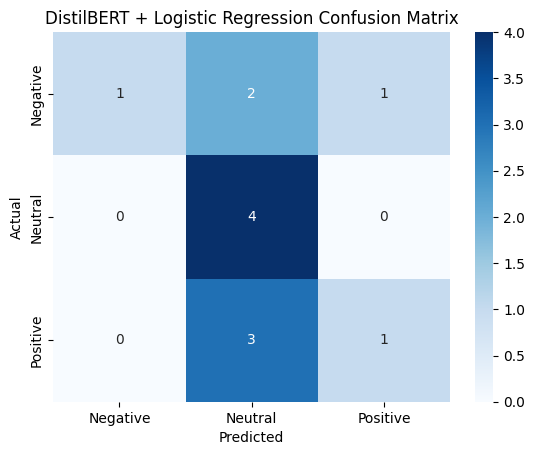


📝 Sample Review: The product quality is excellent but delivery was slow.
Predicted Sentiment: Positive


In [29]:
##DistilBERT + Logistic Regression + SMOTE
# ==========================================================
# 📦 IMPORTS
# ==========================================================
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
# 🧠 LOAD DATA
# ==========================================================
df = pd.read_csv("/content/chatgpt_review_dataset.csv")

# Example columns: "review" and "rating"
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)
print(df["sentiment"].value_counts())

# Drop missing values
df.dropna(subset=["review"], inplace=True)

# ==========================================================
# 🔤 DISTILBERT SETUP
# ==========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
model = model.to(device)
model.eval()

# ==========================================================
# ✨ EMBEDDING FUNCTION
# ==========================================================
def get_distilbert_embeddings(text_list, batch_size=8):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            # Mean pooling of token embeddings
            last_hidden_state = outputs.last_hidden_state
            attention_mask = inputs["attention_mask"]
            mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
            mean_embeddings = (last_hidden_state * mask_expanded).sum(1) / mask_expanded.sum(1)
            embeddings.append(mean_embeddings.cpu().numpy())
    return np.vstack(embeddings)

# ==========================================================
# 🔢 CREATE EMBEDDINGS
# ==========================================================
print("\n🔄 Generating DistilBERT embeddings...")
X = get_distilbert_embeddings(df["review"].tolist())
y = df["sentiment"]

print("✅ Embedding shape:", X.shape)

# ==========================================================
# ⚖️ BALANCE DATA (SMOTE)
# ==========================================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y_encoded)

# ==========================================================
# 🧩 TRAIN-TEST SPLIT
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ==========================================================
# ⚙️ TRAIN LOGISTIC REGRESSION
# ==========================================================
clf = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# ==========================================================
# 📊 EVALUATE
# ==========================================================
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Accuracy: {acc*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ==========================================================
# 🎨 VISUALIZE CONFUSION MATRIX
# ==========================================================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DistilBERT + Logistic Regression Confusion Matrix")
plt.show()

# ==========================================================
# 🔮 SAMPLE PREDICTION
# ==========================================================
sample = ["The product quality is excellent but delivery was slow."]
sample_emb = get_distilbert_embeddings(sample)
sample_pred = le.inverse_transform(clf.predict(sample_emb))

print("\n📝 Sample Review:", sample[0])
print("Predicted Sentiment:", sample_pred[0])



✅ Accuracy: 50.00%
📈 Macro F1 Score: 0.494

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.25      0.33         4
     Neutral       0.75      0.75      0.75         4
    Positive       0.33      0.50      0.40         4

    accuracy                           0.50        12
   macro avg       0.53      0.50      0.49        12
weighted avg       0.53      0.50      0.49        12


🔹 Confusion Matrix:
 [[1 0 3]
 [0 3 1]
 [1 1 2]]


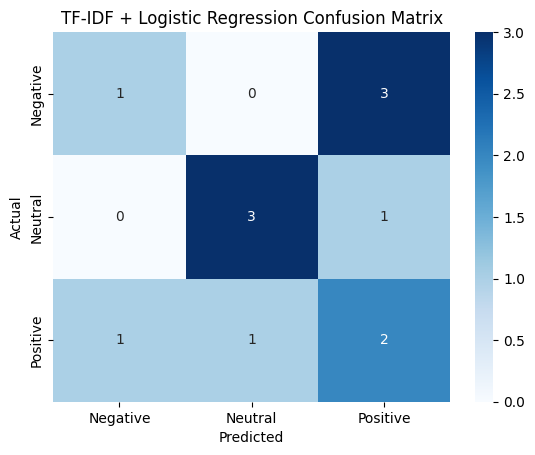


📝 Sample Review: The product quality is excellent but delivery was slow.
Predicted Sentiment: Negative


In [30]:
#--------------------------------------------------------
#  TF-IDF + Logistic Regression Confusion Matrix
#---------------------------------------------------------
#
import pandas as pd, numpy as np, re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt, seaborn as sns

# 🧼 Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 📥 Load and Prepare Data
df = pd.read_csv("/content/chatgpt_review_dataset.csv")
df.dropna(subset=["review", "rating"], inplace=True)
df["cleaned"] = df["review"].apply(clean_text)

def map_sentiment(rating):
    if rating in [1, 2]: return "Negative"
    elif rating == 3: return "Neutral"
    else: return "Positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

# 🔤 Encode Labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["sentiment"])

# 🔢 TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = vectorizer.fit_transform(df["cleaned"])
y = df["label"]

# ⚖️ Balance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# ⚙️ Train Logistic Regression
clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# 📊 Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print(f"\n✅ Accuracy: {acc*100:.2f}%")
print(f"📈 Macro F1 Score: {f1:.3f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🎨 Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("TF-IDF + Logistic Regression Confusion Matrix")
plt.show()

# 🔮 Sample Prediction
sample = ["The product quality is excellent but delivery was slow."]
sample_clean = [clean_text(s) for s in sample]
sample_vec = vectorizer.transform(sample_clean)
sample_pred = le.inverse_transform(clf.predict(sample_vec))

print("\n📝 Sample Review:", sample[0])
print("Predicted Sentiment:", sample_pred[0])